In [1]:
import torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sgld

In [5]:
torch.cuda.set_device(0)

In [6]:
model = sgld.MnistModel()

In [7]:
train_loader, test_loader = sgld.make_datasets()

In [8]:
optimizer = sgld.SGLD(model.parameters(), lr=0.01)

In [9]:
model = model.cuda()

In [10]:
def lossrate(t, a, b, gamma):
    return a * np.power(b, gamma) /np.power((t+b), gamma)

In [11]:
t = np.arange(600)
a, b , gamma = .2, 15, .6
#plt.plot([lossrate(t, a, b, gamma) for t in t])

In [12]:
loss, acc, val, histo = sgld.train(model, 5, train_loader, test_loader, lambda x: lossrate(x, a, b, gamma), False, optimizer)

/home/henripal/projects/sgld/sgld/sgld/model.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch: 0	Loss: 1.558	Acc: 55.103	Val Acc: 87.317
Epoch: 1	Loss: 0.372	Acc: 88.651	Val Acc: 93.013
Epoch: 2	Loss: 0.249	Acc: 92.719	Val Acc: 94.201
Epoch: 3	Loss: 0.209	Acc: 93.834	Val Acc: 94.763
Epoch: 4	Loss: 0.186	Acc: 94.501	Val Acc: 95.251
Total number of steps: 295


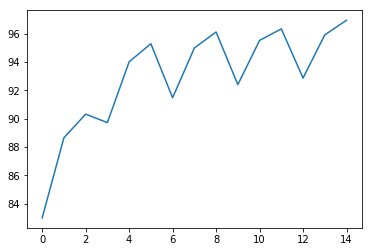

In [15]:
plt.plot(val)

In [ ]:
import numpy.lib.stride_tricks as npst
def running_func(seq, func, window=20):
    stride = seq.strides[0]
    sequence_strides = npst.as_strided(seq, shape=[len(seq) - window + 1, window], strides=[stride, stride])
    return func(sequence_strides) 

In [ ]:
running_stds = []
for row in param_histo.T:
    running_stds.append(running_func(row,lambda x: np.std(x, axis=1), 40))

In [ ]:
maxi = np.max(np.vstack(running_stds), axis=0)

In [ ]:
maxi2 = np.max(np.vstack(running_stds), axis=0)

In [ ]:
plt.plot((maxi))
plt.plot((maxi2))

In [ ]:
plt.plot(np.log(maxi))
plt.plot(np.log(maxi2))

In [ ]:
running_vals = []
for row in param_histo.T:
    running_vals.append(running_func(row,lambda x: x,  100))

ha = np.vstack(running_vals)

In [ ]:
item = 3000
indices = [-1, -10, -100, -300]
toplot = [running_vals[item][i, :] for i in indices]
legends = [str(i) for i in indices]
plt.rcParams["patch.force_edgecolor"] = True
x, y, _ = plt.hist(toplot, bins=10, alpha=0.5, label=legends)
    
plt.legend()

In [ ]:
item = 300
indices = [-1, -10, -100, -300]
toplot = [running_vals2[item][i, :] for i in indices]
legends = [str(i) for i in indices]
plt.rcParams["patch.force_edgecolor"] = True
x, y, _ = plt.hist(toplot, bins=10, alpha=0.5, label=legends)
    
plt.legend()

In [ ]:
plt.plot(y[:-1], np.array(x).T, label=np.array(legends).T)
plt.legend()

In [ ]:
plt.plot(y[:-1], np.array(x).T, label=np.array(legends).T)
plt.legend()